In [67]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('model-v0f.h5')
model.summary()

train_data_dir = '/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/dataset-manual/'

img_height = 32
img_width = 32
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(img_height, img_width),
    batch_size=batch_size)

labels = dict((v, k) for k, v in train_generator.class_indices.items())

def prepare_x(path, debug=False):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if (debug):
        plt.figure(figsize=(1,1))
        plt.imshow(img, cmap=plt.get_cmap('gray'))
    
    img_rows, img_cols = 32, 32
    re_img = cv2.resize(img, (img_rows, img_cols))
    re_img = re_img.astype('float32')
    re_img /= 255
    x = re_img.reshape(1, img_rows, img_cols, 1)
    return x

def predict_x(path, debug=False):
    x = prepare_x(path, debug)
    x_proba = model.predict(x)
    x_classes = x_proba.argmax(axis=-1)
    return x_classes[0]

def ppp(path, debug=False):
    x = predict_x(path, debug)
    print(path, labels[x])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [68]:
import os

base_path = '/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/dataset-prepare/'

/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/dataset-prepare/0000a250-29.png 1


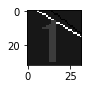

In [73]:
files_file = [
    '0000a250-29.png',
]

for img_path in files_file:
    try:
         ppp(os.path.join(base_path, img_path), debug=True)
    except Exception as e:
        print(os.path.join(base_path, img_path), e)

8FBCF12FBDA5F5D6B4D3201827A827B7


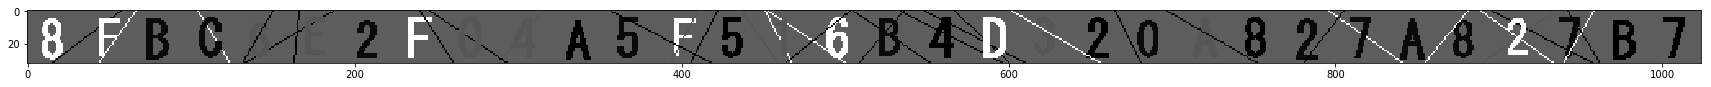

In [89]:
resources_path = '/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/image/'

def prepare_xz(img, debug=False):
    img_rows, img_cols = 32, 32
    re_img = cv2.resize(img, (img_rows, img_cols))
    re_img = re_img.astype('float32')
    re_img /= 255
    x = re_img.reshape(1, img_rows, img_cols, 1)
    return x

def predict_xz(img, debug=False):
    x = prepare_xz(img, debug)
    x_proba = model.predict(x)
    x_classes = x_proba.argmax(axis=-1)
    return x_classes[0]

def pppz(path, debug=False):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if (debug):
        plt.figure(figsize=(30,15))
        plt.imshow(img, cmap=plt.get_cmap('gray'))

    result = ''
    
    for i in range(32):

        x = (32*i)
        y = 0
        w = 32
        h = 32

        try:
            dist = img[y: y + h, x: x + w]
            xz = predict_xz(dist, debug)
            result +=  labels[xz]
        except Exception as e:
            print(path, e)
            result +=  '*'
        
    print(result)
    
    
img_path = '000020c0.png'
try:
     pppz(os.path.join(resources_path, img_path), debug=True)
except Exception as e:
    print(e)

7D3320498E5EDDBB121CB293147FD241


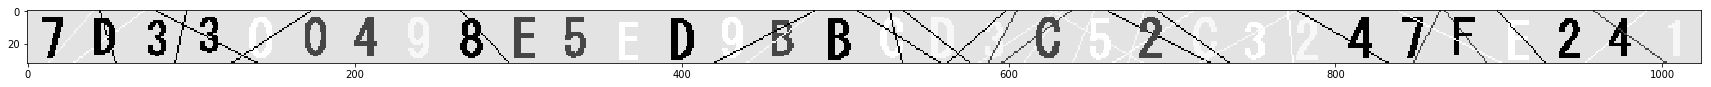

In [91]:
img_path = '000022e0.png'
try:
     pppz(os.path.join(resources_path, img_path), debug=True)
except Exception as e:
    print(e)

6D1986D9C1F1FFD71E7F0025A2DFCF19


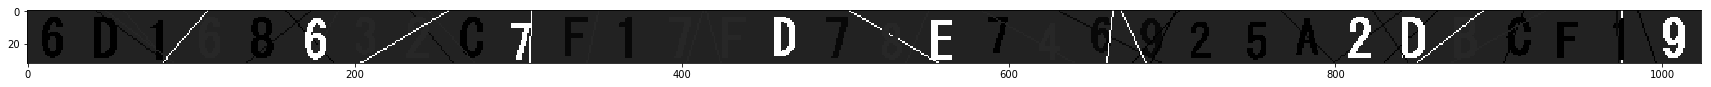

In [92]:
img_path = '000027b0.png'
try:
     pppz(os.path.join(resources_path, img_path), debug=True)
except Exception as e:
    print(e)